## Cross Correlation of Predictor Variables

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy import optimize  #Used to fit the regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statistics
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## correlation matrix 
def corr_matrix_plot(X, indicator):
    corr_matrix = X.corr(method = 'pearson', min_periods=1)
    corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_)) #remove upper triangle for plot
    sns.set(font_scale=2)
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(1,1,1)
    ax = sns.heatmap(
        corr_matrix, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True, fmt=".2f", annot_kws={"size": 18})
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'),
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0);
    #ax.get_yaxis().set_visible(False)
    #ax.get_xaxis().set_visible(False)
    fig.savefig('./results/variable_correlation/correlation_matrix_'+indicator, dpi=300)
    

## Days No Flow Observed

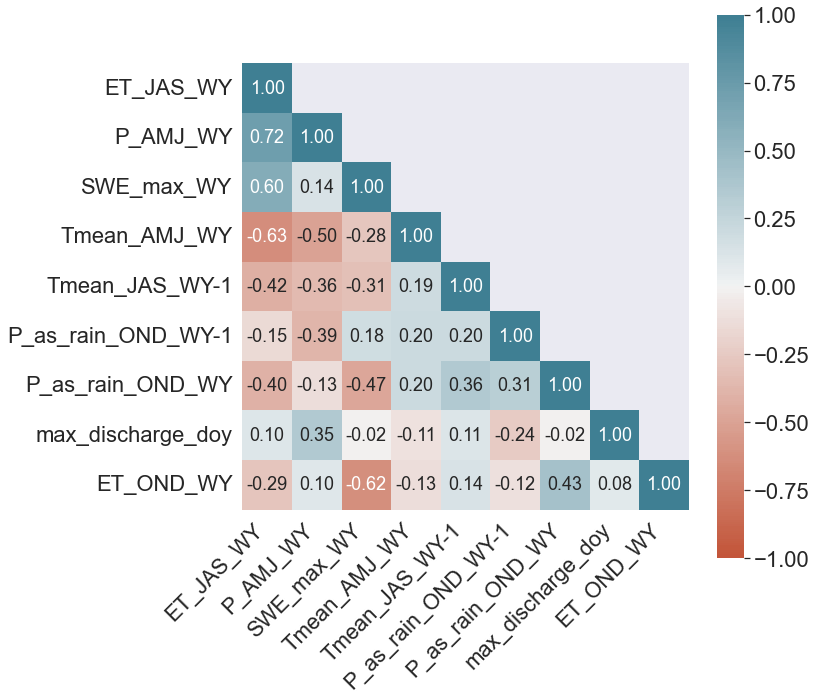

In [3]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data.drop(['year.1'], axis=1, inplace=False)
#data = data[data['year'] != 2001] #remove 2001 because of NaNs
data = data.astype(float)

X = data[['ET_JAS_WY','P_AMJ_WY', 'SWE_max_WY', 'Tmean_AMJ_WY', 'Tmean_JAS_WY-1', 'P_as_rain_OND_WY-1', 
          'P_as_rain_OND_WY', 'max_discharge_doy','ET_OND_WY']]
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns.values))
y = data['days_no_flow_observed']
corr_matrix_plot(X_scaled, 'days_no_flow_observed')

## No Flow Start Date

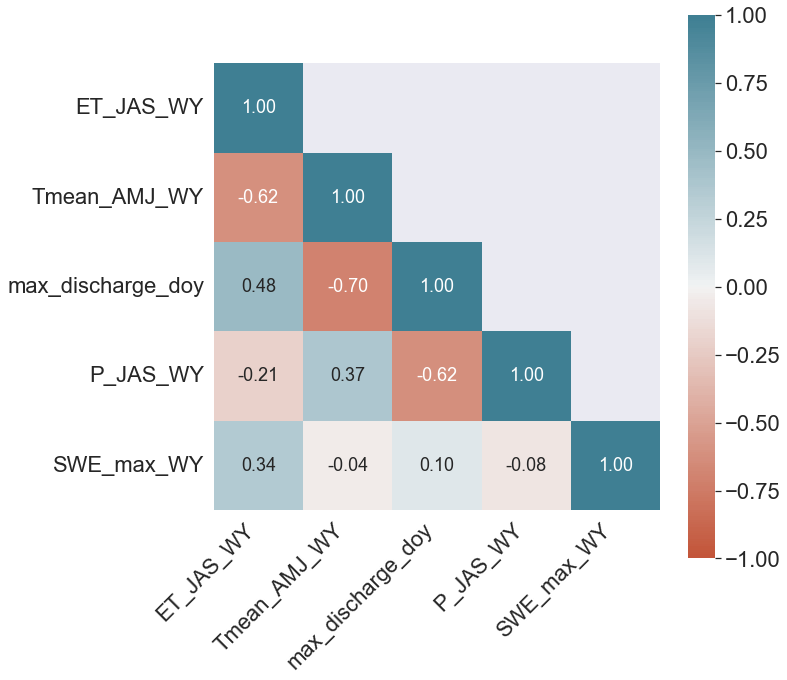

In [4]:
data = pd.read_csv("./master_data/filtered_indicator_and_predictor_variables.csv")
data[data == 'NaN'] = np.nan #set nan values
data[data == ' '] = np.nan #set nan values
data.drop(['year.1'], axis=1, inplace=False)
data = data[data['year'] != 2001] #remove 2001 because of NaNs
data = data.dropna(axis=0) #drop any row with NaN
data = data.astype(float)

X = data[['ET_JAS_WY','Tmean_AMJ_WY', 'max_discharge_doy', 'P_JAS_WY', 'SWE_max_WY']]
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns.values))
y = data['no_flow_start_date_doy']
corr_matrix_plot(X_scaled, 'no_flow_start_date_doy')

## Day Flow Returns

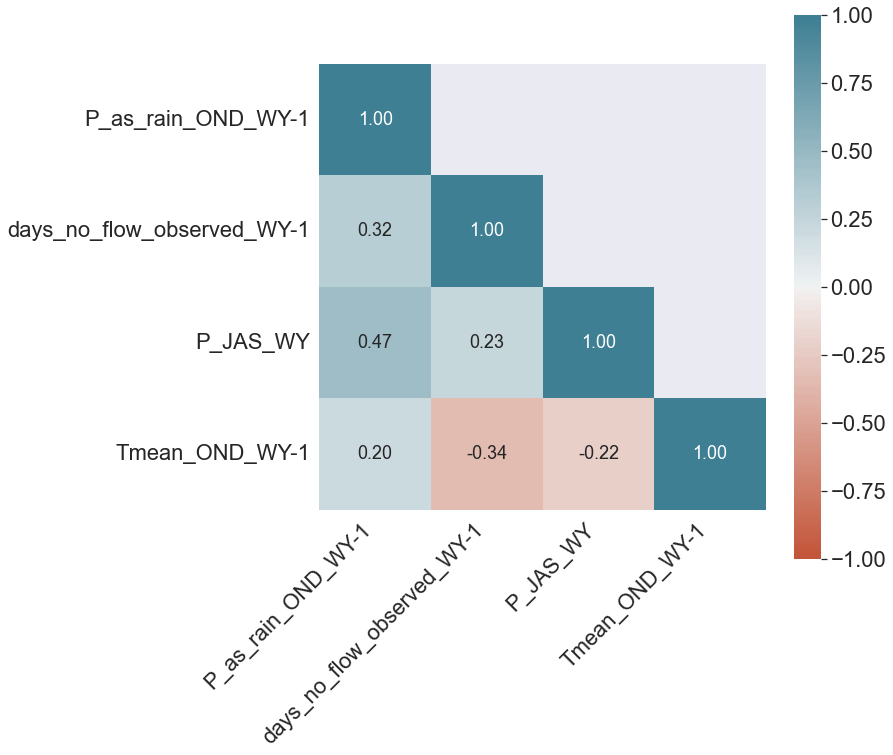

In [5]:
X = data[['P_as_rain_OND_WY-1', 'days_no_flow_observed_WY-1', 'P_JAS_WY', 'Tmean_OND_WY-1' ]]
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns.values))
y = data['flow_returns_doy']
corr_matrix_plot(X_scaled, 'flow_returns_doy')

## Peak Discharge to First Dry

,max_discharge_doy,ET_OND_WY,P_JFM_WY,fraction_snow_JFM_WY,PET_JAS_WY
1,104.0,4.763477,8.1,0.851852,57.038967
2,83.0,4.767194,11.0,0.781818,54.491550
3,139.0,5.727392,6.6,0.500000,57.435380
4,71.0,5.505453,8.6,0.686047,57.869480
5,127.0,5.116165,12.3,0.813008,58.011383
8,92.0,5.038812,15.4,0.318182,58.276733
9,97.0,5.779578,6.4,0.750000,55.603090
10,46.0,5.031006,14.3,0.559441,55.823772
11,41.0,5.288105,6.7,0.253731,56.176815
12,67.0,4.999228,10.6,0.716981,56.011883


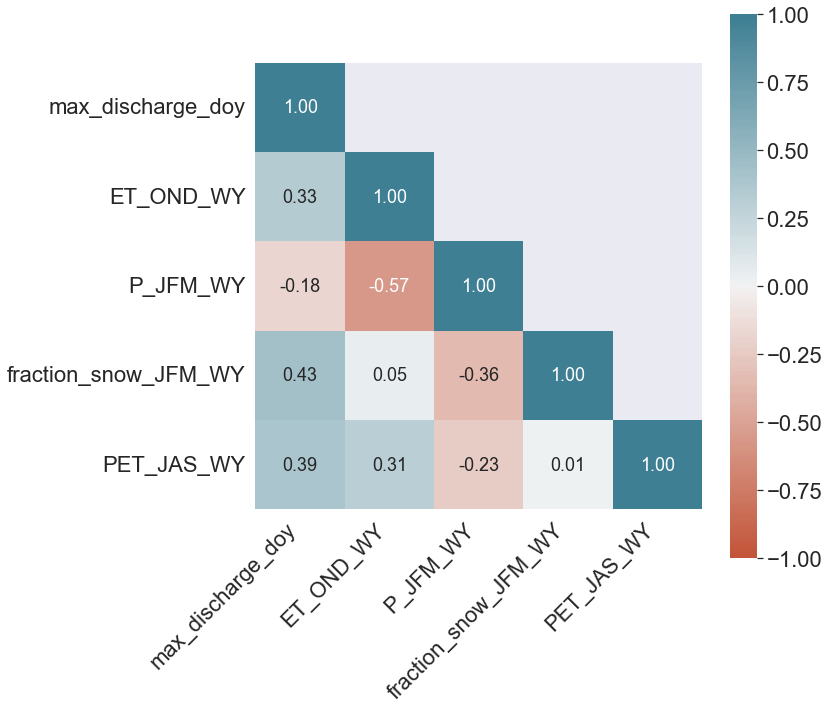

In [6]:
X = data[['max_discharge_doy', 'ET_OND_WY', 'P_JFM_WY','fraction_snow_JFM_WY', 'PET_JAS_WY']]
display(X)
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = list(X.columns.values))
y = data['peak_discharge_to_dry_duration_days']
corr_matrix_plot(X_scaled, 'peak_discharge_to_dry_duration_days')